# Multiple Linear Regression - Exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size_year.csv'. 

You are expected to create a multiple linear regression (similar to the one in the lecture), using the new data. 

In this exercise, the dependent variable is 'price', while the independent variables are 'size' and 'year'.

Good luck!

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
sn.set()

## Load the data

In [2]:
df = pd.read_csv('real_estate_price_size_year.csv')

In [3]:
df.head()

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009


In [23]:
df.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


In [59]:
df['year_old_10'] = df['year'].apply(lambda i: 0 if(2020-i > 10) else 1)

In [60]:
df.head()

,price,size,year,year_old_10
0,234314.144,643.09,2015,1
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,1
4,458674.256,1275.46,2009,0


## Create the regression

### Declare the dependent and the independent variables

In [61]:
y = df['price']
x1 = df[['size','year_old_10']]

### Regression

In [62]:
x = sm.add_constant(x1.values)
results = sm.OLS(y,x).fit()

In [63]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     168.1
Date:                Fri, 21 Feb 2020   Prob (F-statistic):           3.04e-32
Time:                        18:19:09   Log-Likelihood:                -1191.8
No. Observations:                 100   AIC:                             2390.
Df Residuals:                      97   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.073e+04   1.26e+04      6.402      0.000    5.57e+04    1.06e+05
x1           228.7932     12.519     18.275      0.000     203.945     253.641
x2          2.779e+04   7546.013      3.683      0.000    1.28e+04    4.28e+04
==============================================================================
Omnibus:                        6.194   Durbin-Watson:                   2.275
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                2.912
Skew:                           0.114   Prob(JB):                        0.233
Kurtosis:                       2.196   Cond. No.                     3.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

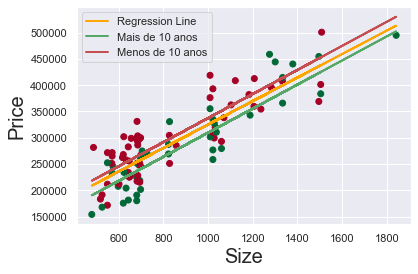

In [66]:
plt.scatter(x1['size'],y,c=df['year_old_10'],cmap='RdYlGn_r')
yhat = 223.1787*x1['size'] + 101900
yhat_old = 80730 + 228.7932*x1['size']
yhat_new = 80730 + 228.7932*x1['size'] + 27790
fig = plt.plot(x1['size'],yhat,lw=2, c='orange', label='Regression Line')
fig = plt.plot(x1['size'],yhat_old,lw=2,c='g', label='Mais de 10 anos')
fig = plt.plot(x1['size'],yhat_new,lw=2,c='r', label='Menos de 10 anos')
plt.xlabel('Size', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.legend()
plt.show()